In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")
pd.set_option("float_format", "{:.3f}".format)

# Loading data

In [2]:
data = pd.read_pickle("data_after_eda.pkl")
data.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall,MinorsAtHome,TotalMntSpent,marital_status,has_a_partner,education
0,58138.000,0,0,58,635,88,546,172,88,88,...,True,False,False,1441,0,0,3058,Single,False,Graduation
1,46344.000,1,1,38,11,1,6,2,1,6,...,True,False,False,15,0,2,42,Single,False,Graduation
2,71613.000,0,0,26,426,49,127,111,21,42,...,True,False,False,692,0,0,1468,Together,True,Graduation
3,26646.000,1,0,26,11,4,20,10,3,5,...,True,False,False,43,0,1,96,Together,True,Graduation
4,58293.000,1,0,94,173,43,118,46,27,15,...,False,False,True,392,0,1,814,Maried,True,PhD


In [3]:
continuous_cols = data.select_dtypes("number").columns
continuous_cols

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Customer_Days', 'MntRegularProds', 'AcceptedCmpOverall',
       'MinorsAtHome', 'TotalMntSpent'],
      dtype='object')

# Scaling

In [4]:
cluster_cols = ["Income", "Kidhome", "TotalMntSpent", "Age", "Recency"]

In [5]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().set_output(transform="pandas")
scaled_data = std_scaler.fit_transform(data[cluster_cols])
scaled_data[:5]

,Income,Kidhome,TotalMntSpent,Age,Recency
0,0.309,-0.828,1.672,1.018,0.315
1,-0.262,1.037,-0.942,1.275,-0.377
2,0.962,-0.828,0.294,0.332,-0.792
3,-1.216,1.037,-0.895,-1.296,-0.792
4,0.317,1.037,-0.273,-1.039,1.560


# K-Means

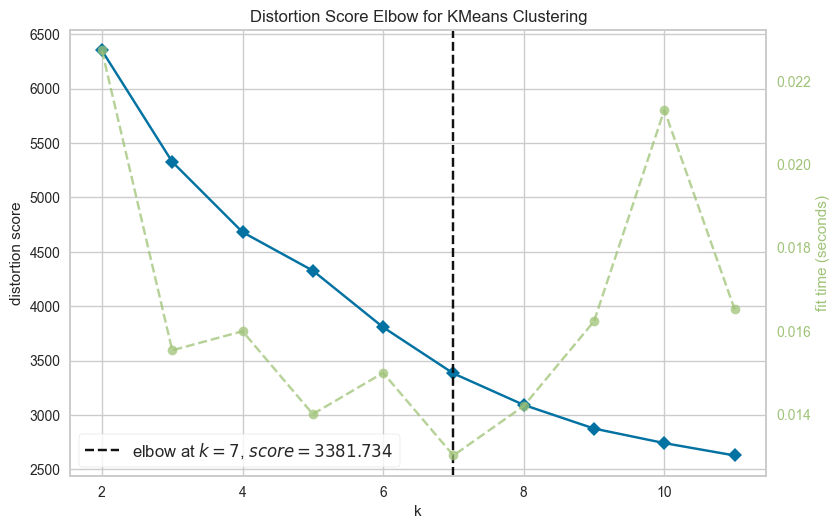

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
elbow = KElbowVisualizer(kmeans, k=(2, 12))

elbow.fit(scaled_data)
elbow.show()

Elbow method indicates that 6 clusters is the ideal for K-Means

# Cluster Analysis

In [22]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)

data["cluster"] = labels


C:\Users\bakad\AppData\Local\Temp\ipykernel_4908\3393372884.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x=col, hue="cluster", ax=axs[i][0])


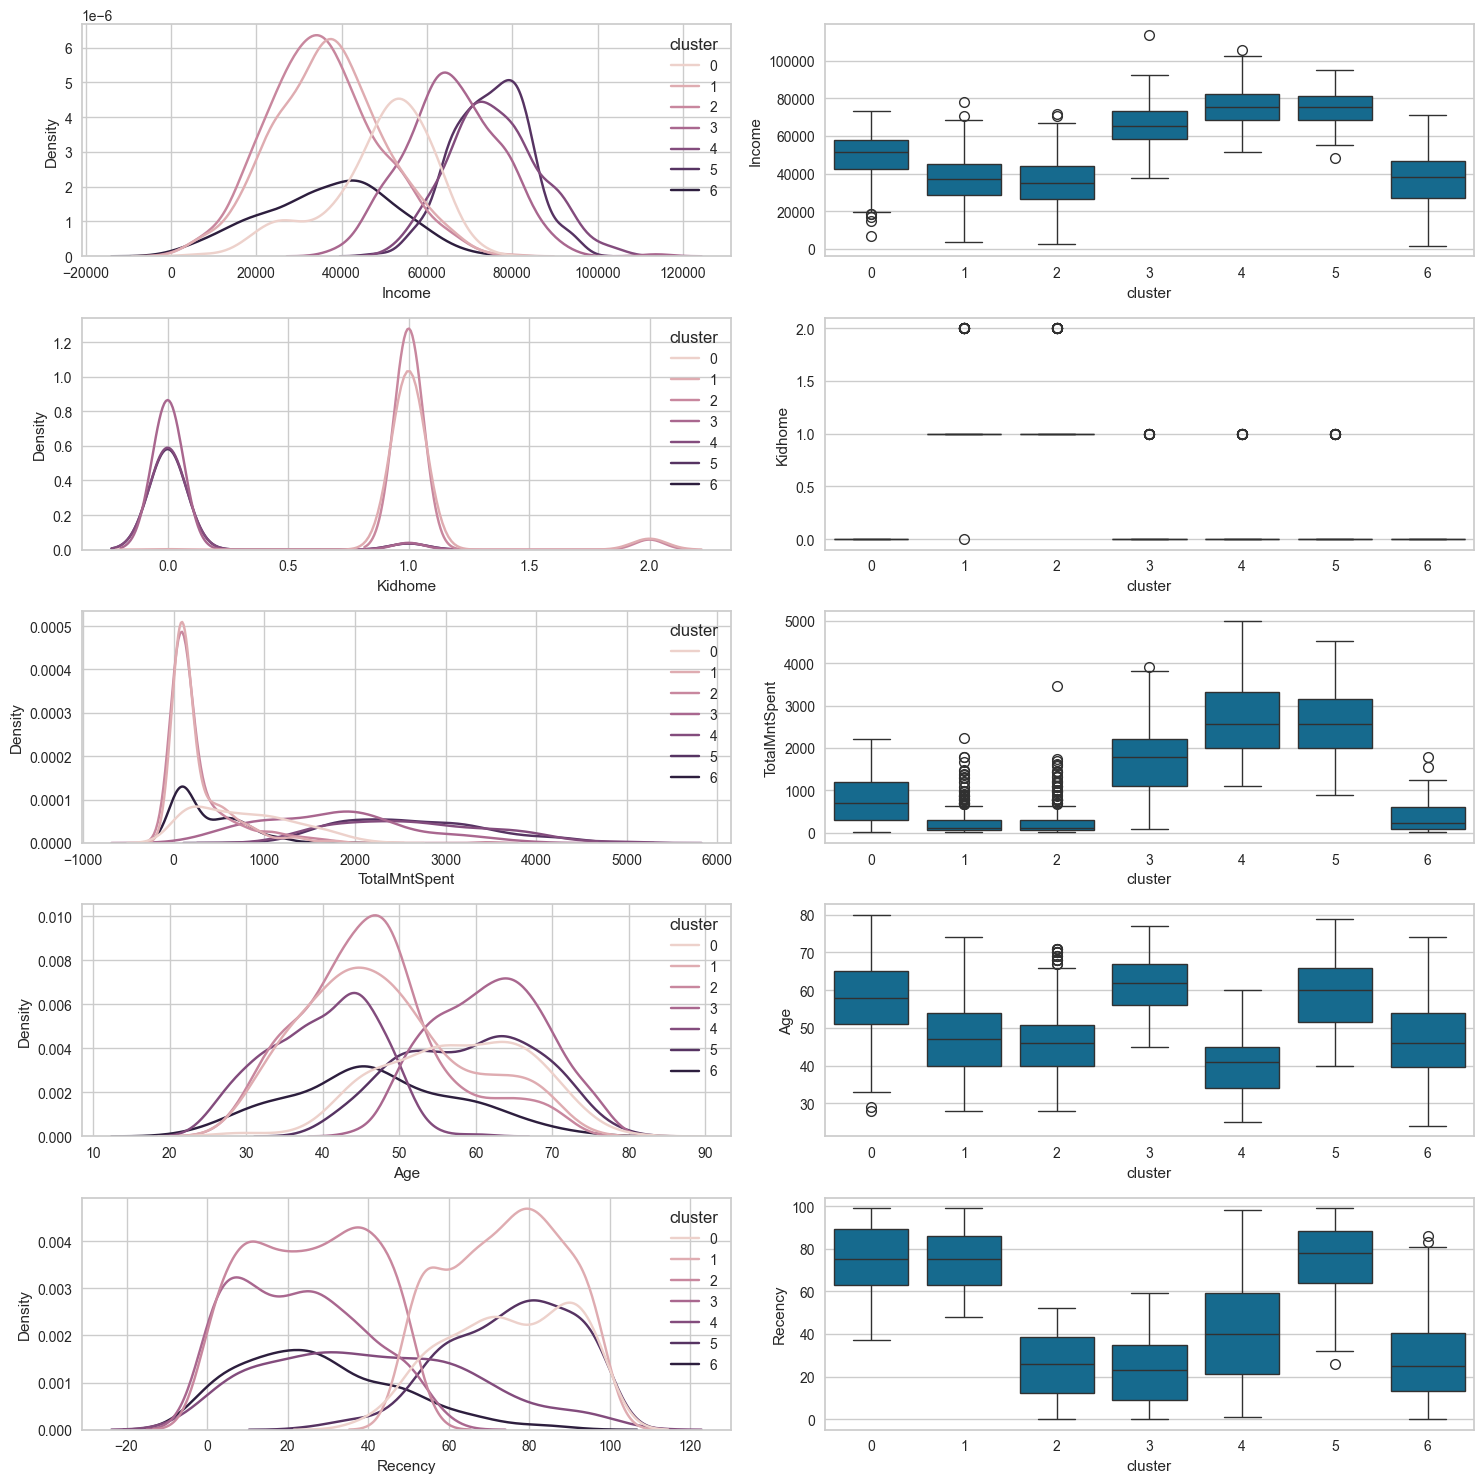

In [33]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

for i, col in enumerate(cluster_cols):
    sns.kdeplot(data=data, x=col, hue="cluster", ax=axs[i][0])
    bxplt = sns.boxplot(data=data, y=col, x="cluster", ax=axs[i][1])
fig.tight_layout()


- Cluster 1:
    - Lower Income
    - 0 to 2 kids
    - Lower Total Amount Spent
    - Around 40 years old
    - High Recency
- Cluster 2:
    - Higher Income
    - 0 to 1 kid
    - Higher Total Amount Spent
    - 50 to 60 years old
    - High Recency
- Cluster 3:
    - Higher Income
    - 0 to 1 Kids
    - Higher Total Amount Spent
    - 40 to 60 years old
    - Lower Recency
- Cluster 4:
    - Lower Income
    - 0 to 2 kids
    - Lower Total Amount Spent
    - Around 40 years old
    - Lower Recency
- Cluster 5:
    - Medium Income
    - No kids
    - Medium Total Amount Spent
    - 50 to 70 years old
    - Medium Recency
- Cluster 6:
    - Medium Income
    - 1 to 2 kids
    - Lower Total Amount Spent
    - 50 to 70 years old
    - Medium Recency

<Axes: xlabel='cluster', ylabel='AcceptedCmpOverall'>

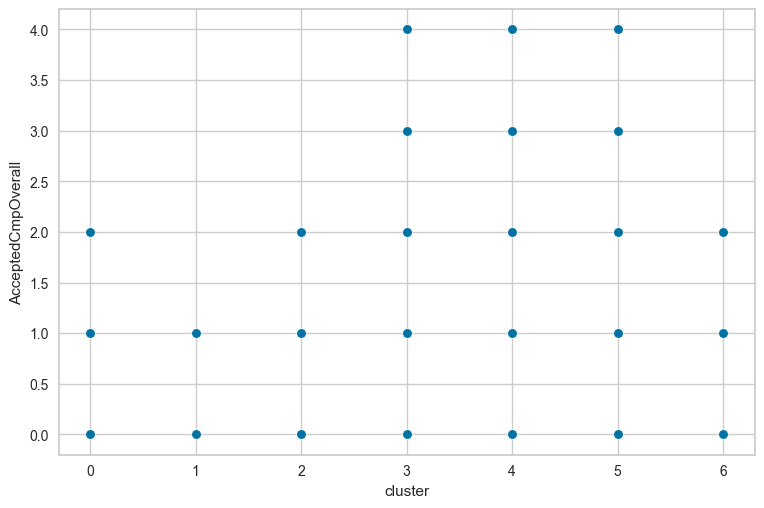

In [24]:
sns.scatterplot(y=data.AcceptedCmpOverall, x=data.cluster)

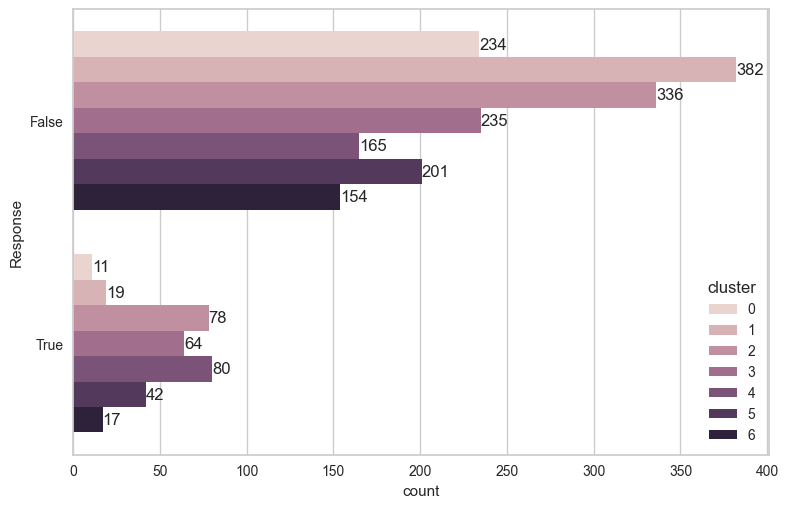

In [25]:
p = sns.countplot(data=data, y="Response", hue="cluster")
for cont in p.containers:
    p.bar_label(cont)


Customers belonging to cluster 3 are more prone to accept the campaigns

In [ ]:
data.to_pickle("data_with_clusters.pkl")